## **Convolutional Neural Network on Medical-Mnist dataset**

Dataset Link - https://www.kaggle.com/andrewmvd/medical-mnist

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing lilbraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import sklearn
import pywt
from PIL import Image,ImageOps
from sklearn.decomposition import PCA
from keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Data Generation

Initializing some useful variables and generating the training data

In [3]:
batch_size = 15000  
n_epochs = 10        
t_size = 150        #image size

data_path = '/content/drive/MyDrive/Tasks/task(CNN)/Medical'
datagen = ImageDataGenerator(rescale=1./255)

#generation of training data           
train_data = datagen.flow_from_directory(data_path, target_size=(t_size,t_size), batch_size=batch_size,
                                              class_mode='categorical', color_mode = 'rgb')

Found 15000 images belonging to 6 classes.


train_data is having a batch of 15000 images, therefore length of train_data is 1; 1 batch with 15000 images belonging of 6 different classes

In [4]:
print("length of training data: ", len(train_data))

length of training data:  1


1 denotes 1 batch of 15000 images




Fetching out the classes, we have.
class_index is having a dictionary with 6 different classes to which images belong

In [5]:
class_index = train_data.class_indices
class_index

{'Abdomen': 0, 'Breast': 1, 'CXR': 2, 'chest': 3, 'hand': 4, 'head': 5}

In [6]:
classes = list(class_index.keys())
classes


['Abdomen', 'Breast', 'CXR', 'chest', 'hand', 'head']

## Data Splitting

Splitting the data further into training and testing datasets
- train_data is having a batch of type 'DirectoryIterator'
- train_data[0] is having a tuple that contains x(image array) and y(image_class array)



In [7]:
X = train_data[0][0]
y= train_data[0][1]

#splitting of images data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Image Preprocessing
For image preprocessing, wavelet method is used for denoising of images via implementation of fourier transform.

Here, we are using discrete wavelet transform instead of continuous wavelet transform.

In [8]:
#defining the preprocessing method
def wavelet(arr):
  lis = []
  for i in arr:
    a = pywt.dwtn(i,'db1','periodic')
    out = pywt.idwtn(a,'db1','periodic')
    out = np.uint8(out)
    lis.append(out)
    return lis
    
X = wavelet(X)

Here, the images in X are very well preprocessed; denoised.


## **Visualising** **images**
We have images of 6 different categories. Visualizing images of each kind.

Breast


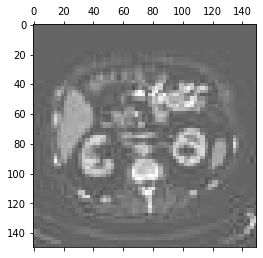

----------------------------------
chest


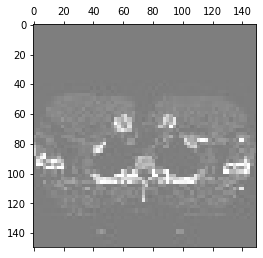

----------------------------------
CXR


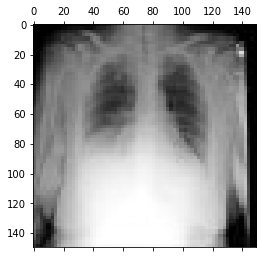

----------------------------------
hand


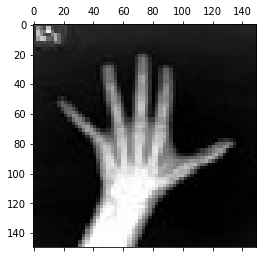

----------------------------------
head


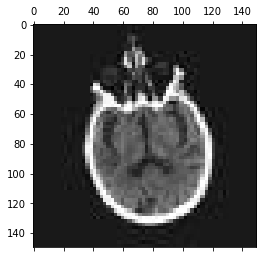

----------------------------------
Abdomen


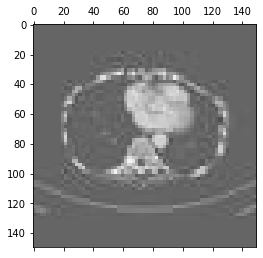

----------------------------------


In [9]:
img_no = 0
c=d=e=f=g=h=0
o = train_data[0][1][50:100]
p = train_data[0][0][50:100]
for i in range(len(o)):
  if img_no<6:
    if list(o[i]).index(1)==0:
      
      if c==0:
        plt.matshow(p[i])
        print(classes[0])
        plt.show()
        print('----------------------------------')
        img_no = img_no+1
        c =1
      else:
        continue

    elif list(o[i]).index(1)==1:
     
      if d==0:
        plt.matshow(p[i])
        print(classes[1])
        plt.show()
        print('----------------------------------')
        img_no = img_no+1
        d =1
      else:
        continue

    elif list(o[i]).index(1)==2:
     
      if e==0:
        plt.matshow(p[i])
        print(classes[2])
        plt.show()
        print('----------------------------------')
        img_no = img_no+1
        e =1
      else:
        continue

    elif list(o[i]).index(1)==3:
      
      if f==0:
        plt.matshow(p[i])
        print(classes[3])
        plt.show()
        print('----------------------------------')
        img_no = img_no+1
        f =1
      else:
        continue

    elif list(o[i]).index(1)==4:
     
      if g==0:
        plt.matshow(p[i])
        print(classes[4])
        plt.show()
        print('----------------------------------')
        img_no = img_no+1
        g =1
      else:
        continue

    elif list(o[i]).index(1)==5:
      
      if h==0:
        plt.matshow(p[i])
        print(classes[5])
        plt.show()
        print('----------------------------------')
        img_no = img_no+1
        h =1
      else:
        continue

These are the scanned images belonging to 6 different classes.

## Convolutional Neural Network
Preparing the neural network for image classification; forming it by layering different Convolution layers, Maxpooling layer, and Dense layer. 

Also, applying some dropouts to reduce the overfitting.

Dropouts at each layer is specified as:
- Input layer: 0.1
- Hidden layer: may vary between the range 0.5-0.8

kernel regularizer is also taken in use for the reduction of overfitting and to optimize the results

In [26]:
#preparing a linear stack of layers with the sequential model
model = tf.keras.models.Sequential()

#adding 1st convolutional layer; Input layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(150,150,3), kernel_regularizer =tf.keras.regularizers.l1( l=0.001)))
model.add(tf.keras.layers.Dropout(0.1))

#adding 2nd convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.001)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.7))

#adding 3rd convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

#flattening output of convolutional layers
model.add(tf.keras.layers.Flatten())

#stacking hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))

#adding a dense layer; output layer
model.add(tf.keras.layers.Dense(6, activation='softmax'))


#setting up an optimizer with a learning rate of 0.001
opt = Adam(0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

#training our model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epochs, verbose=1)
model.save_weights('cnn_model.h5')

Epoch 1/10
329/329 [==============================] - 25s 74ms/step - loss: 1.2098 - acc: 0.7695 - val_loss: 0.7933 - val_acc: 0.7724
Epoch 2/10
329/329 [==============================] - 24s 73ms/step - loss: 0.2585 - acc: 0.9561 - val_loss: 0.4578 - val_acc: 0.8747
Epoch 3/10
329/329 [==============================] - 24s 73ms/step - loss: 0.1737 - acc: 0.9601 - val_loss: 0.3524 - val_acc: 0.8891
Epoch 4/10
329/329 [==============================] - 24s 73ms/step - loss: 0.1528 - acc: 0.9575 - val_loss: 1.1527 - val_acc: 0.7838
Epoch 5/10
329/329 [==============================] - 24s 73ms/step - loss: 0.1417 - acc: 0.9570 - val_loss: 0.1657 - val_acc: 0.9558
Epoch 6/10
329/329 [==============================] - 24s 73ms/step - loss: 0.1079 - acc: 0.9645 - val_loss: 0.1373 - val_acc: 0.9589
Epoch 7/10
329/329 [==============================] - 24s 73ms/step - loss: 0.1066 - acc: 0.9623 - val_loss: 0.1358 - val_acc: 0.9613
Epoch 8/10
329/329 [==============================] - 24s 73ms

In [27]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_23 (Dropout)         (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 148, 148, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 74, 74, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)       

## **Visualizing performance of model**

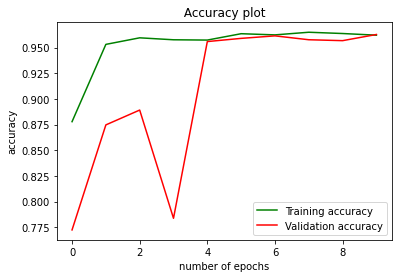

In [28]:
#accuracy plot
plt.plot(history.history['acc'], 'g', label='Training accuracy')
plt.plot(history.history['val_acc'], 'r', label='Validation accuracy')
plt.title(' Accuracy plot ')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend()
plt.show()

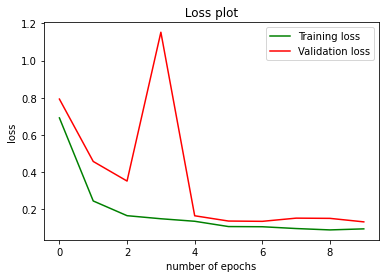

In [29]:
#loss plot
plt.plot(history.history['loss'], 'g', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title(' Loss plot ')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend()
plt.show()

## Model's prediction

Predicting some output through testing data as an input

In [30]:
#prediction
pred= model.predict(X_test)
pred = np.argmax(pred, axis=1)

In [31]:
y_test.shape

(4500, 6)

In [32]:
pred.shape

(4500,)

In [33]:
ytest=  []
for i in y_test:
  ytest.append(list(i).index(1))

ytest = np.array(ytest)

In [34]:
ytest.shape

(4500,)

## Confusion Matrix

In [35]:
cm= confusion_matrix(ytest, pred)
print('---------------CONFUSION MATRIX------------------')
cm

---------------CONFUSION MATRIX------------------


array([[755,   1,   0,   0,   0,   0],
       [152, 601,   0,   0,   0,   0],
       [  0,   0, 758,   0,   4,   0],
       [  0,   0,   0, 758,   0,   0],
       [  1,   2,   1,   0, 704,   5],
       [  0,   1,   0,   0,   1, 756]])

## Classification report

In [37]:
cr= classification_report(ytest, pred)
print('------------------CLASSIFICATION REPORT------------------')
print(cr)

------------------CLASSIFICATION REPORT------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       756
           1       0.99      0.80      0.89       753
           2       1.00      0.99      1.00       762
           3       1.00      1.00      1.00       758
           4       0.99      0.99      0.99       713
           5       0.99      1.00      1.00       758

    accuracy                           0.96      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.96      0.96      4500

